<a href="https://colab.research.google.com/github/b3ampaw/Gradient_Descent/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as py
import pandas as pd

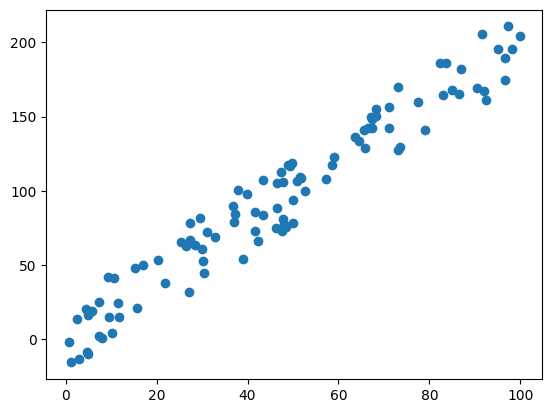

In [2]:
# Create a sample data
N = 100
D = 100

x = np.random.rand(N) * D
y = 2*x

# create noise data
na = 50
fakenoise = (np.random.rand(len(y))-0.5)*na

#add noise
y = y + fakenoise

#plot noisy data
py.scatter(x,y)

In [3]:
# initiate parameter w = 0
w = 0
# hypothesis trendline
h = w*x

# MSE
def mse_cal(y,h):
  return np.mean((y-h)**2)

# Loss function  = ตัวเดียวกันกับ MSE แต่แล้วแต่เราจะใส่เลข สุ่ม ๆ
def Loss_func(w):
  h = w*x
  return mse_cal(y,h)

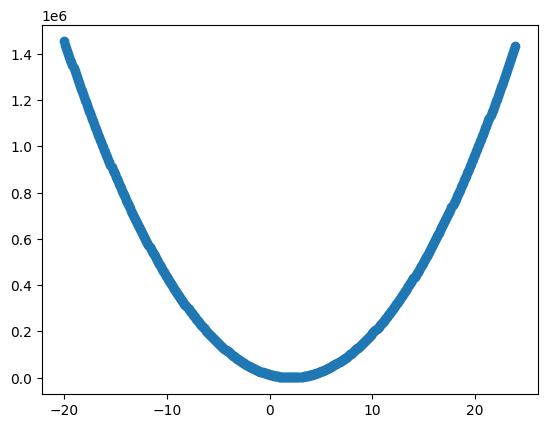

In [4]:
# วิธีการหาค่า parameter แบบ simple

# อันนี้เราจะสุ่ม weight มาหลาย ๆ ค่า จะได้ไม่ต้องใส่เองทีละค่า
wList = np.arange(-200,240)/10

# create empty list to record error for each W
mseList = []

# loop for every w in wList
for w in wList:
  mse = Loss_func(w)
  mseList.append(mse)

# plot Loss function
py.scatter(wList, mseList)

In [5]:
edat = pd.DataFrame()
edat['mse'] = mseList
edat['weight'] = wList

# find row that has the lowest mse
edat.sort_values(by='mse').head()

,mse,weight
220,200.333424,2.0
221,212.623274,2.1
219,247.979753,1.9
222,284.849303,2.2
218,355.562260,1.8


In [6]:
# w =2 will get the lowest MSE
Loss_func(2)

200.3334243800789

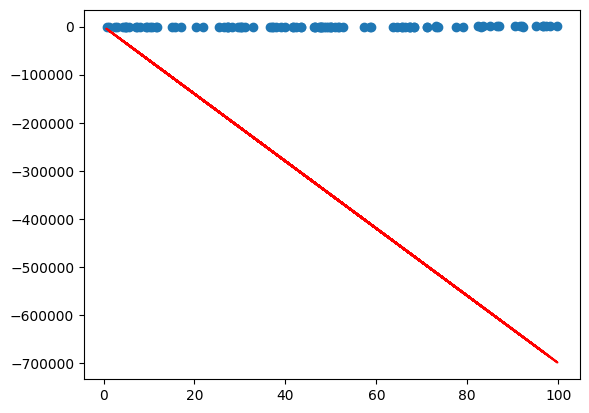

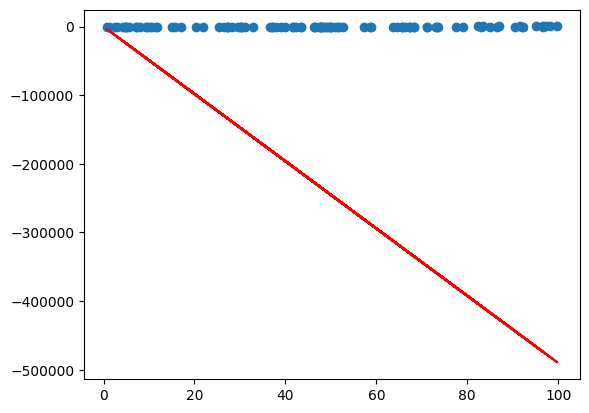

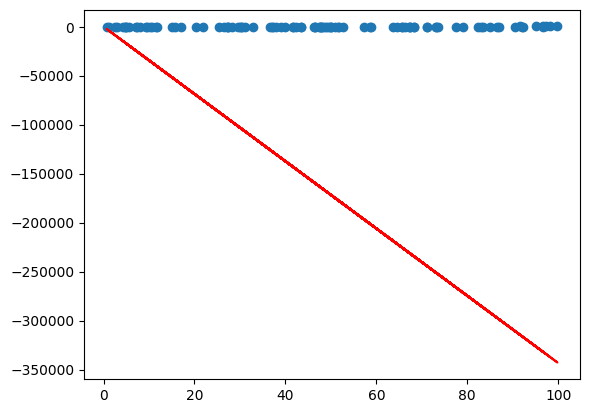

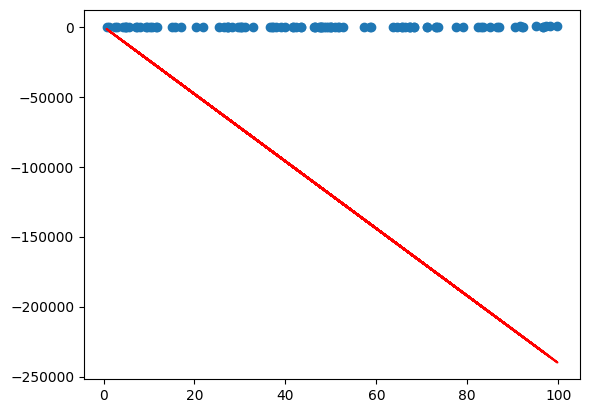

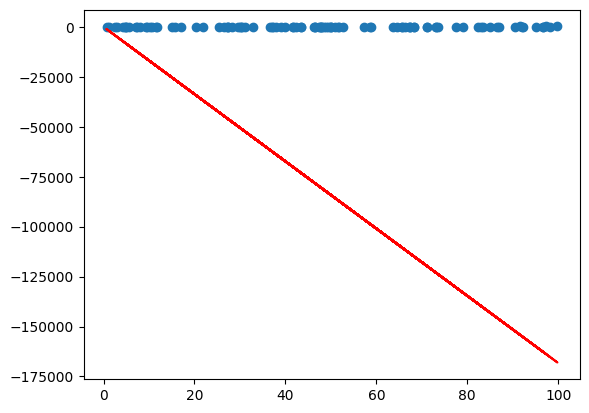

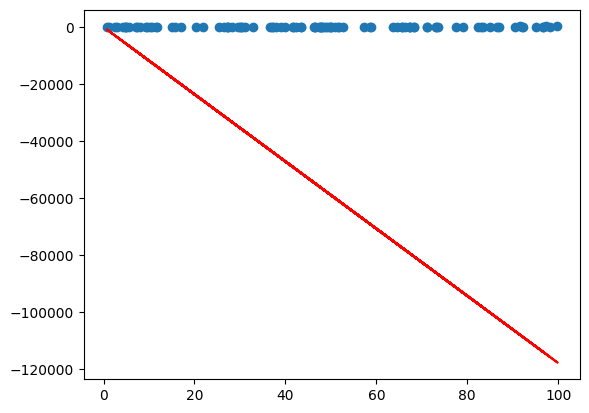

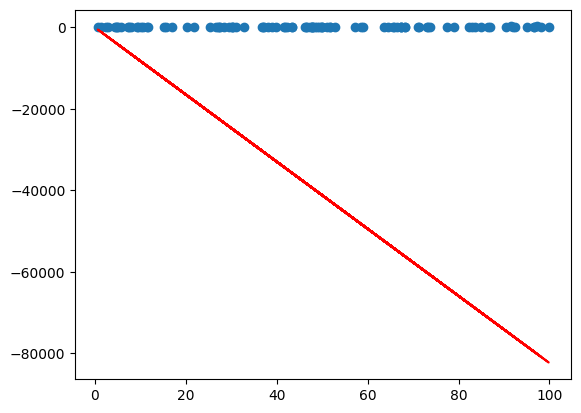

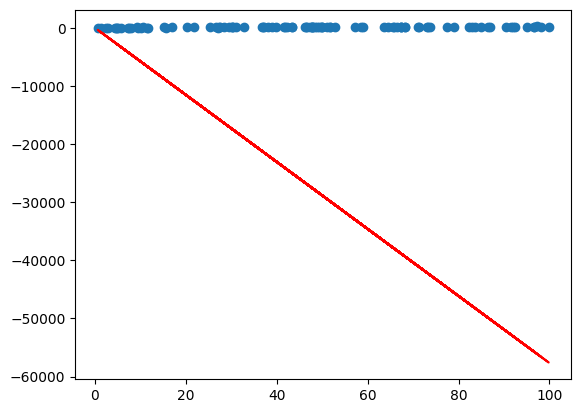

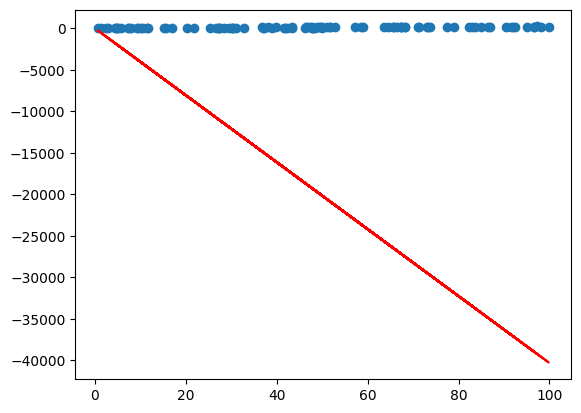

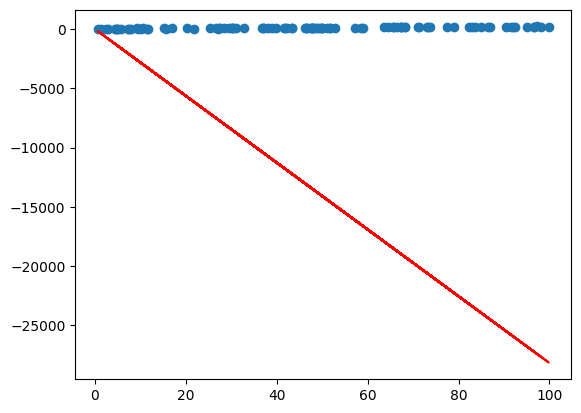

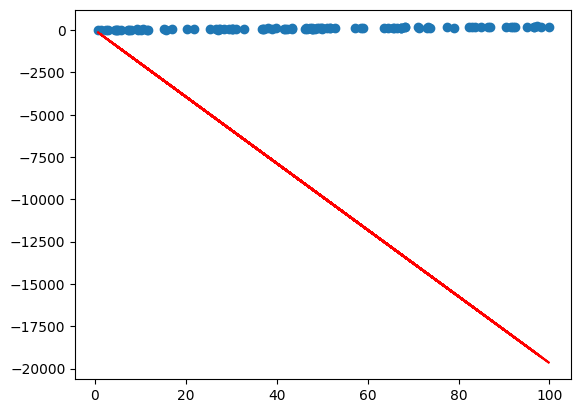

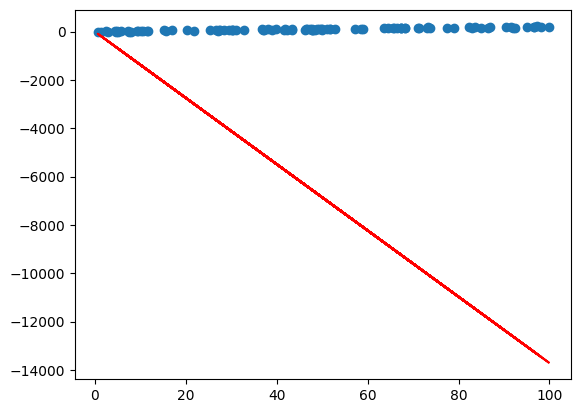

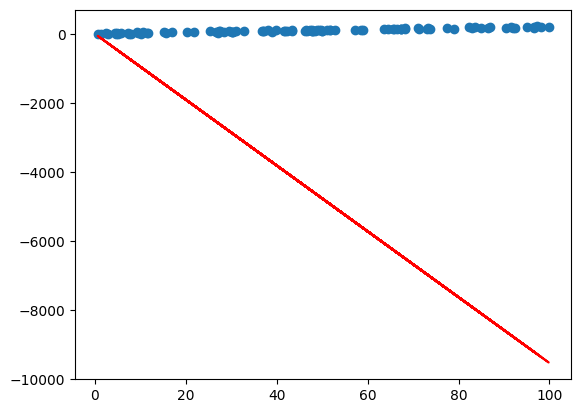

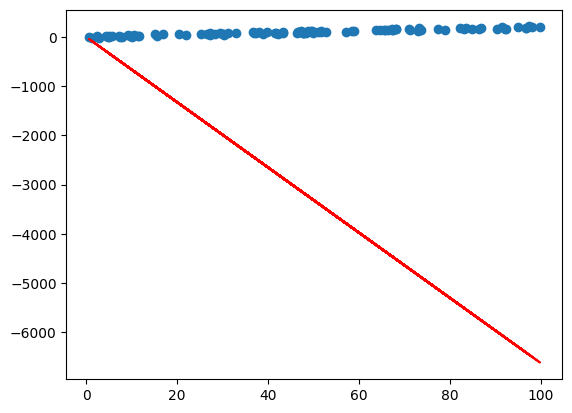

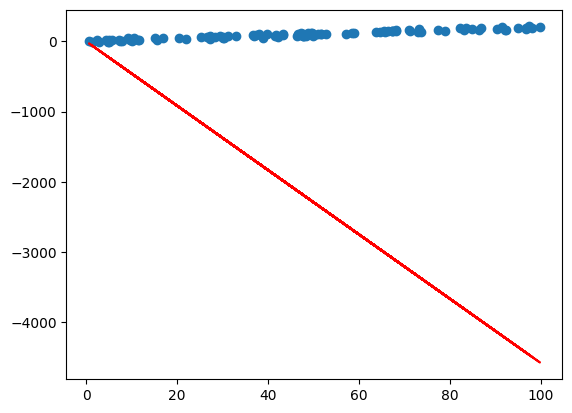

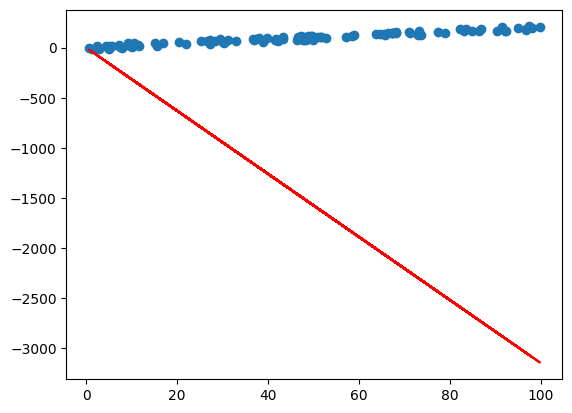

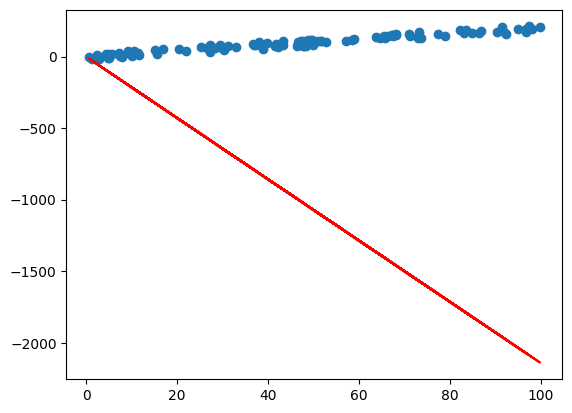

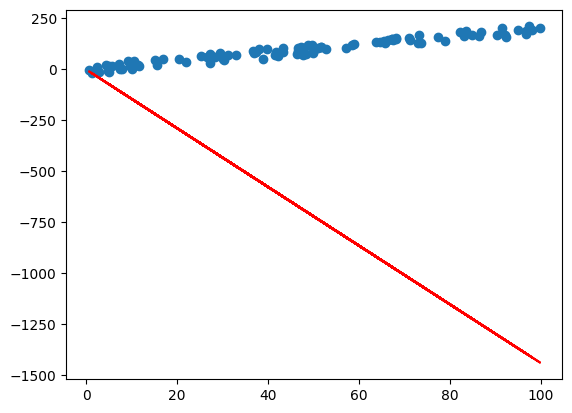

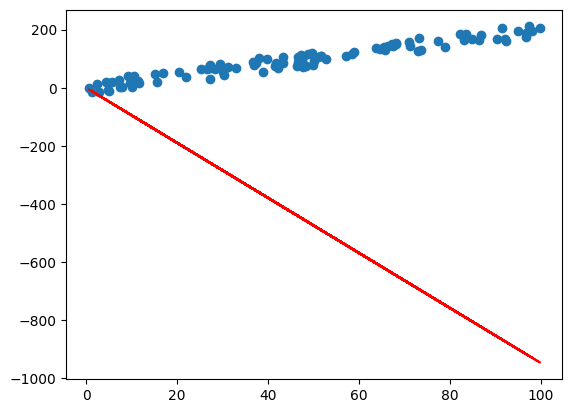

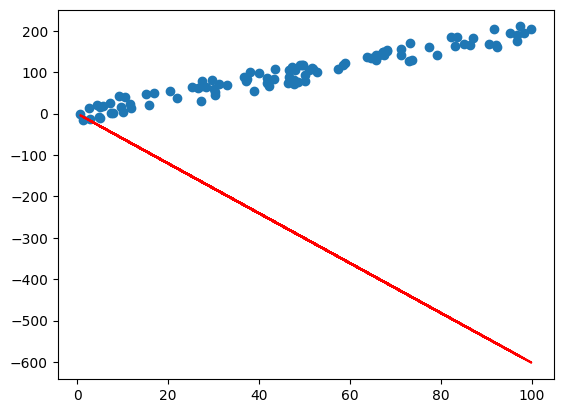

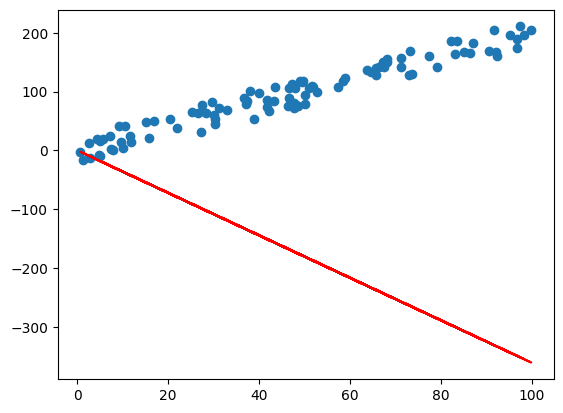

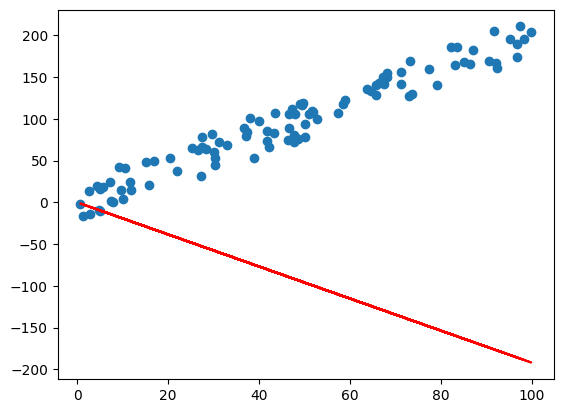

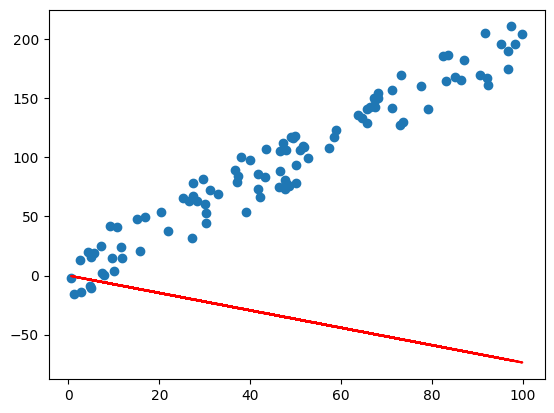

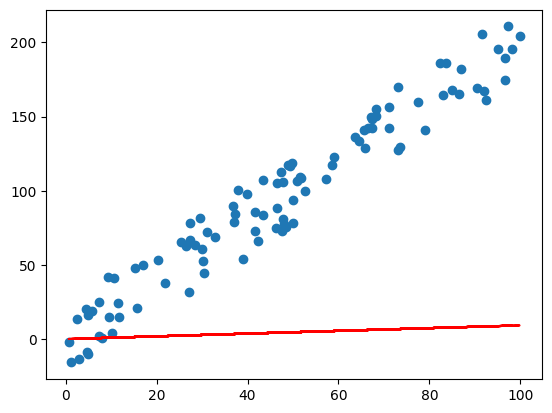

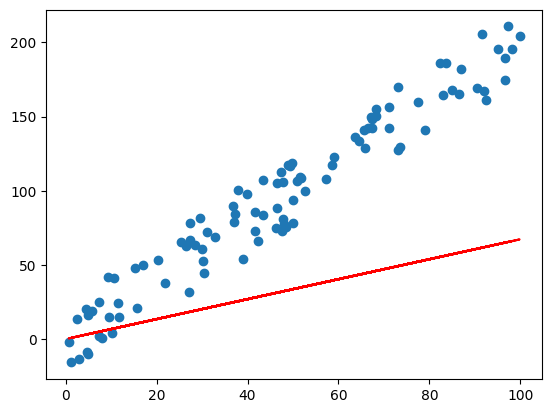

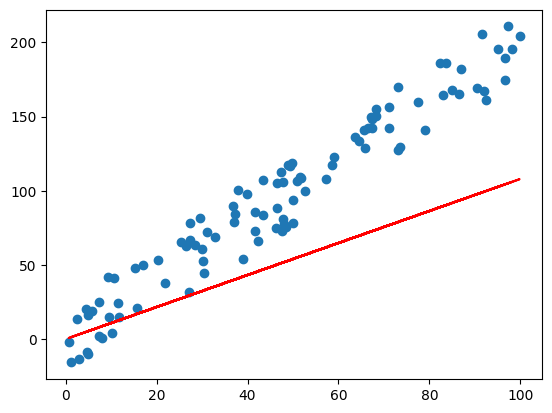

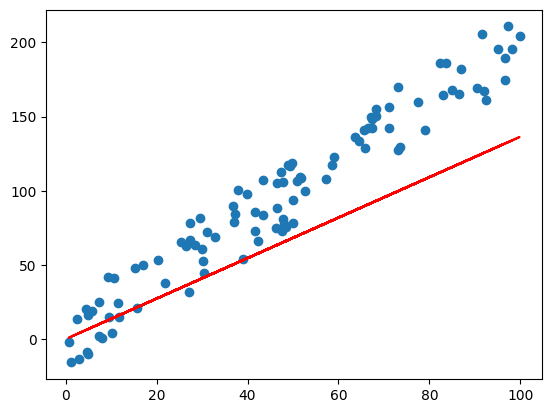

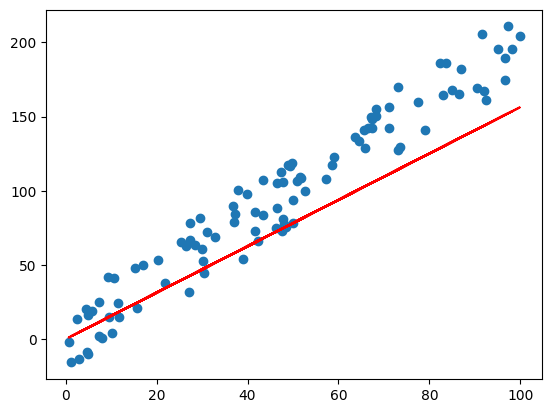

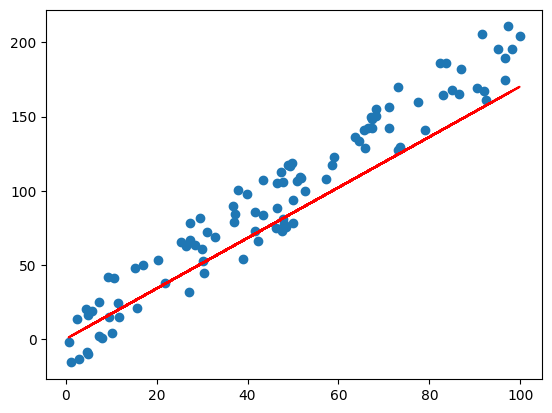

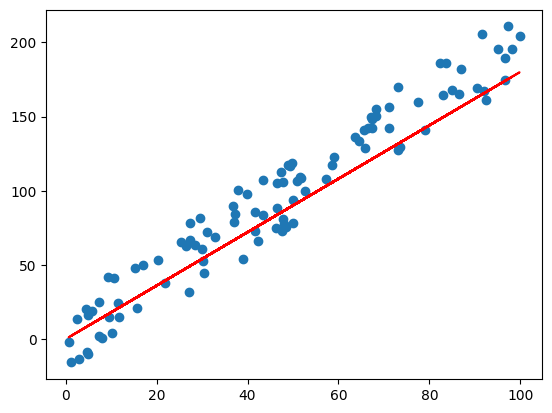

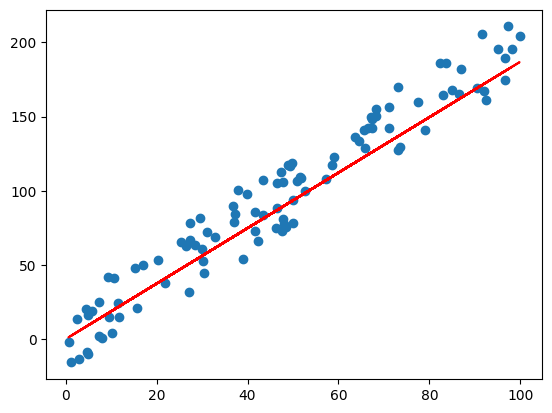

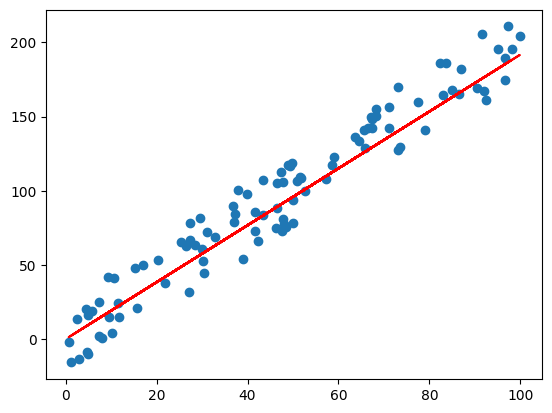

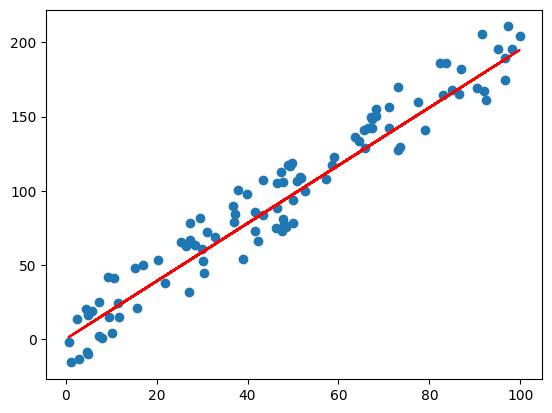

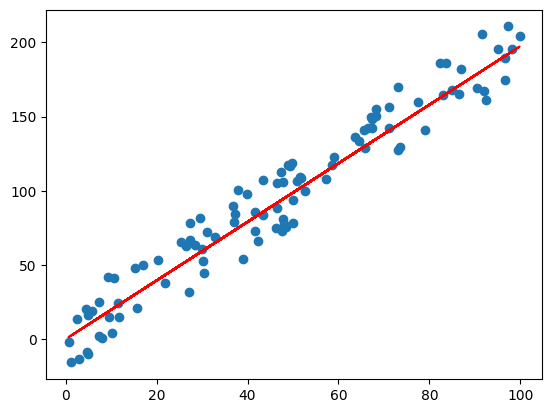

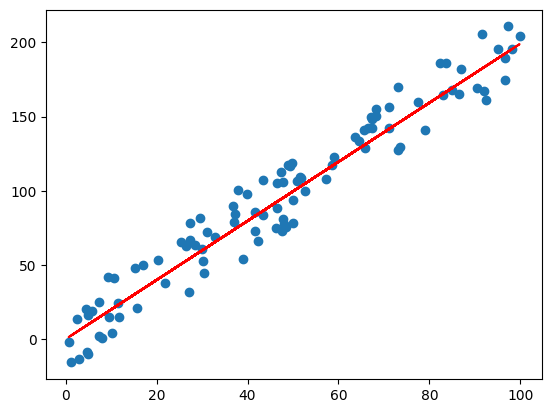

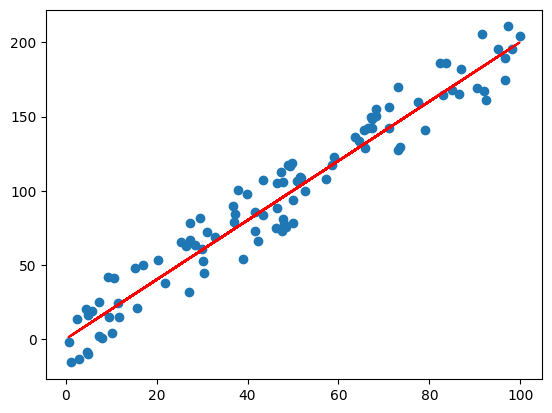

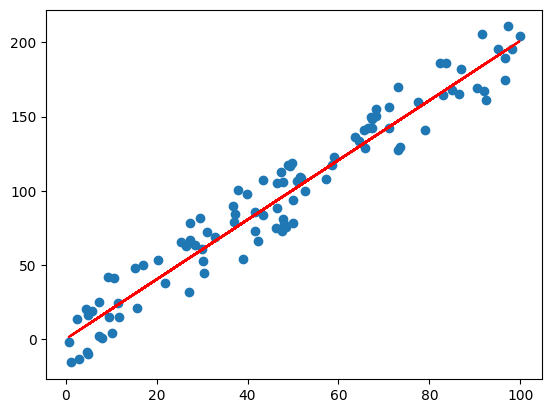

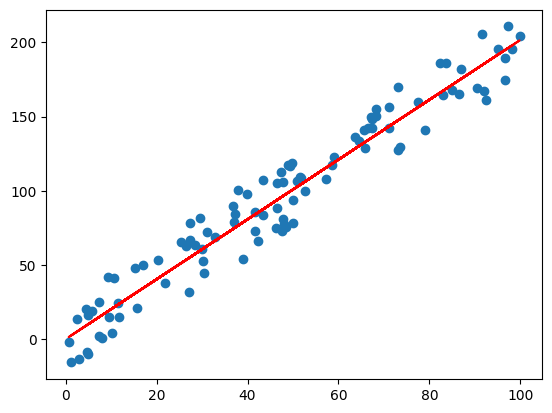

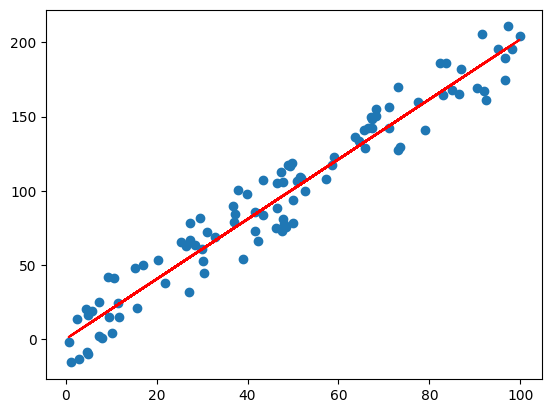

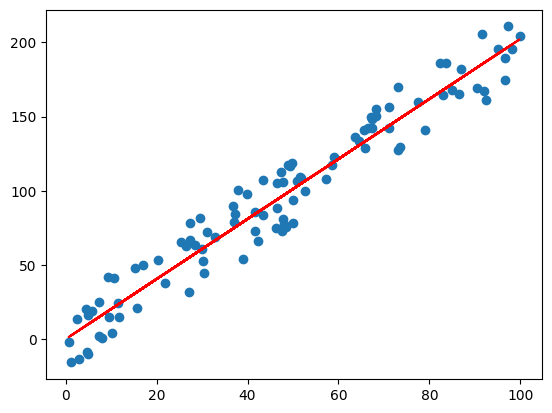

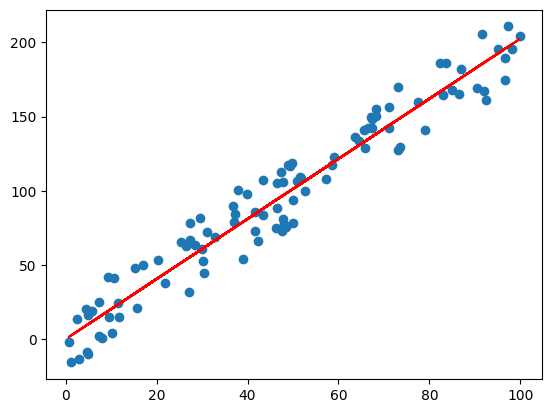

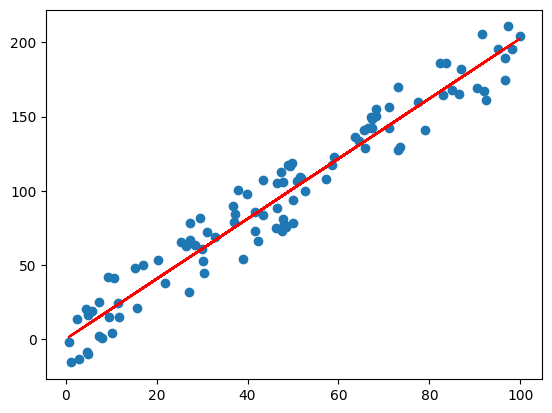

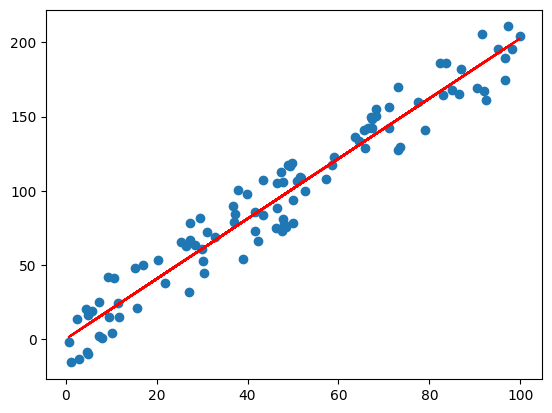

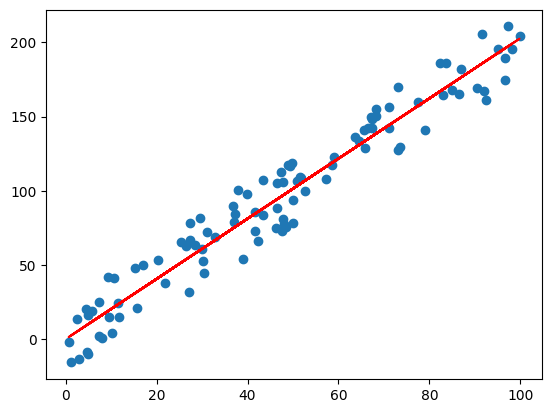

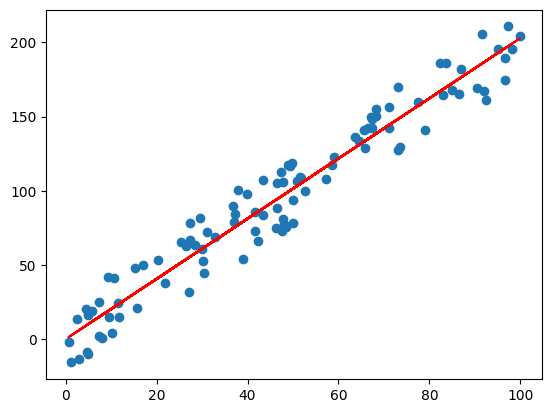

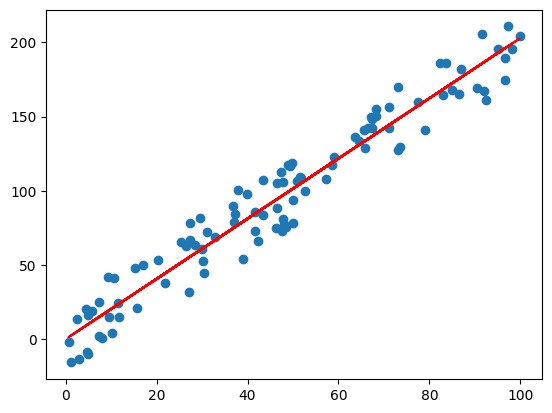

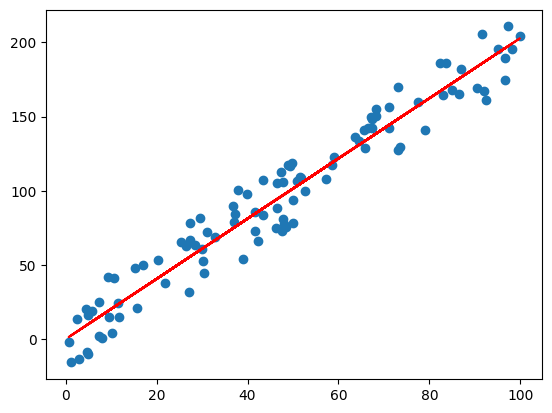

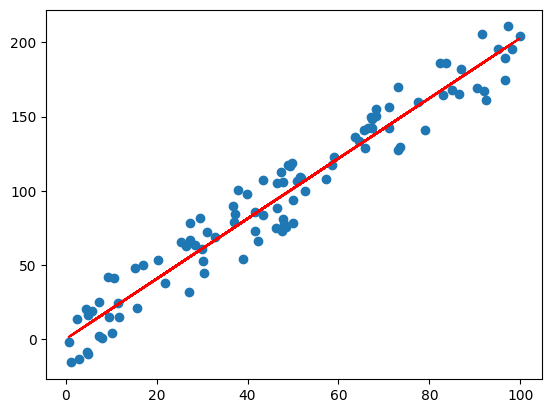

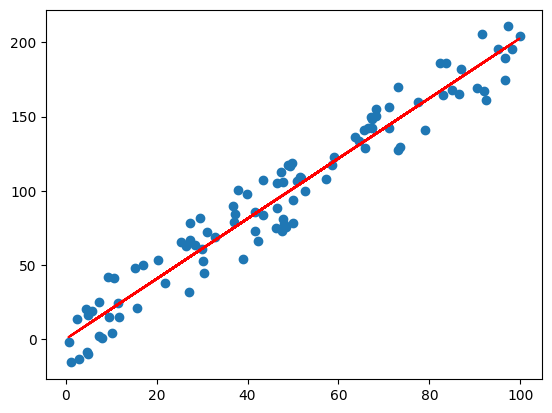

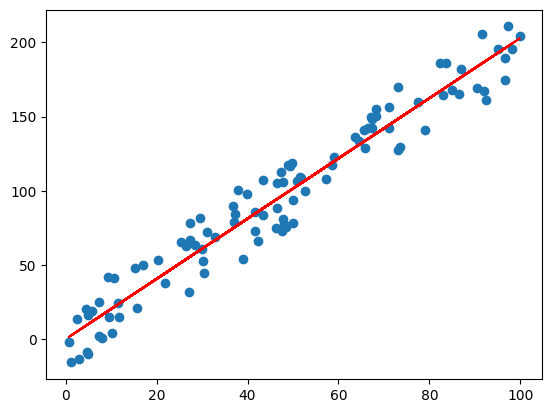

In [7]:
# วิธีการหาค่า parameter ที่ดีที่สุดโดยใช้ Gradient descent
# def train_model(w=-10000, alpha=0.0001,iter=50):
#   mse = Loss_func(w)
#   wList = [w]
#   mseList = [mse]
#   fig, ax1 = plt.subplots()

def train_model(iter=20, w=-10000, alpha=0.0001):
  mse = Loss_func(w)
  wList = [w]
  mseList = [mse]
  for i in range(iter):
    h = w * x
    slope = np.mean((h - y) * x)
    w = w - alpha * slope
    fig, ax1 = py.subplots()
    mseList.append(mse)
    wList.append(w)
    ax1.scatter(x, y)
    ax1.plot(x,x*w,c='r')
    py.show()
  return wList, mseList

w_list, loss_list = train_model(iter=50)

In [8]:
w_list[-1]

2.029311076614834

In [10]:
Loss_func(2.029311076614834)

197.72641816615072